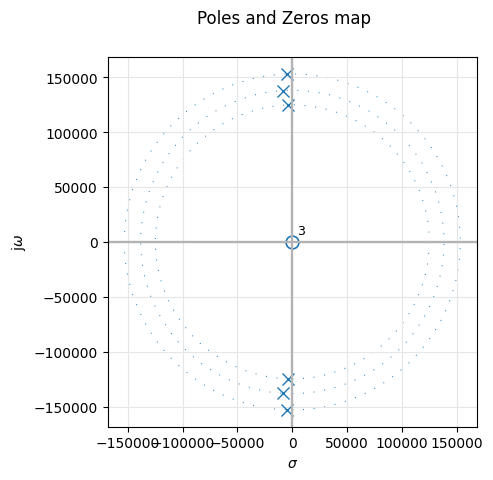

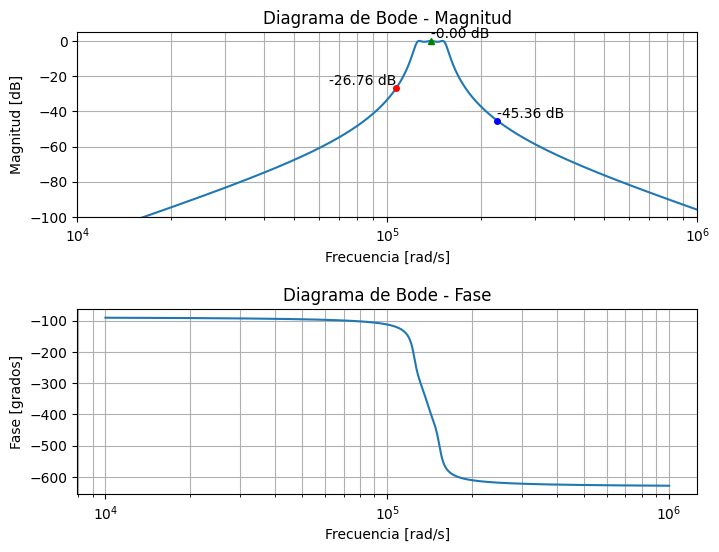

In [25]:
import sympy as sp
from sympy.abc import s

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from pytc2.sistemas_lineales import pzmap, bodePlot, tf2sos_analog, analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

n = 3
r = 0.5   ## Atenuacion en dB

fs1 = 17*10**3
fs2 = 36*10**3

fo = 22*10**3
wo = 2*np.pi*fo
q = 5
bw = wo/q

b, a = signal.cheby1(n, r,1,analog=True)
b, a = signal.lp2bp(b,a,wo,bw)

tf = signal.TransferFunction(b,a)
pzmap(tf, fig_id=1) #S plane pole/zero plot


#--------------------------------------------------------------
# Generar el grillado de frecuencias

# Crear un vector de frecuencias con mayor resolución
w = np.logspace(4, 6, num=1000)  # Rango de 10^4 a 10^6 con 1000 puntos

# Calcular la respuesta en frecuencia del sistema
w, mag, phase = signal.bode(tf, w)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar fs1
idx_1 = np.where(w >= (2*np.pi*fs1))[0][0]
mag_marker_1 = mag[idx_1]
ax1.plot(w[idx_1], mag[idx_1], 'ro', markersize=4)
ax1.text(w[idx_1], mag[idx_1], f'{mag_marker_1:.2f} dB', ha='right', va='bottom')

# Marcar fs2
idx_2 = np.where(w >= (2*np.pi*fs2))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'bo', markersize=4)
ax1.text(w[idx_2], mag[idx_2], f'{mag_marker_2:.2f} dB', ha='left', va='bottom')

# Marcar fo
idx_3 = np.where(w >= (2*np.pi*fo))[0][0]
mag_marker_3 = mag[idx_3]
ax1.plot(w[idx_3], mag[idx_3], 'g^', markersize=4)
ax1.text(w[idx_3], mag[idx_3], f'{mag_marker_3:.2f} dB', ha='left', va='bottom')

# Ajustar límites del eje x
ax1.set_xlim(10**4, 10**6)

# Ajustar límites del eje y
ax1.set_ylim(-100,5)

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()